## Prediction of H1N1 and Seasonal Flu Vaccination Uptake Using Machine Learning.

### Introduction
**Influenza** is a contagious respiratory illness that can cause serious complications, sometimes leading to hospitalization or even death. Remember the **Spanish Flu** that spread across the world courtesy of returning soldiers after World War 1? That was influenza. Those most at risk include older adults (65+ years), young children, and individuals with underlying health conditions (WHO, 2024).

![Makeshift Spanish Flu ward, 1918](Makeshift_spanish_flu_ward.JPG)

The best way to protect yourself is through an annual flu vaccine, which reduces the severity of illness and related complications. The vaccine works by stimulating your immune system to produce protective antibodies within about two weeks (CDC, 2024). Health authorities recommend that everyone aged 6 months and older get vaccinated every year.

The **H1N1 pandemic** began in 2009 when a new influenza A virus strain emerged in the United States. It caused widespread illness and an estimated 151,700–575,400 deaths globally. Unlike typical seasonal flu, this outbreak mainly affected children and younger adults, while older adults were less impacted—likely because they had pre-existing immunity from exposure to a similar virus decades earlier. A targeted vaccine was rolled out in October 2009, and by August 2010, the World Health Organization declared the pandemic over. However, H1N1 did not disappear; it continues to circulate as part of the seasonal flu viruses we see today (CDC, 2024).

![Electron microscope image of H1N1 virus](Electron_microscopy_h1n1_virus.JPG)

**Coronavirus Disease 2019 (COVID‑19)** was first identified in late 2019 in Wuhan, China, after clusters of patients presented with a severe respiratory illness resembling viral pneumonia. Rapid global spread, high hospitalization burdens in some settings, and early mortality uncertainty drove an urgent push to develop vaccines at unprecedented speed. That speed—along with changing public guidance, misinformation, and broader social distrust—contributed to widespread worry and reluctance around COVID‑19 vaccination in many communities (WHO; CDC; global public health reports).

This hesitation was not new. During the 2009 pandemic, public health officials reported similar concerns about a “fast‑tracked” vaccine, and uptake varied widely across populations. Studies from that period showed that risk perception, trust in authorities, and beliefs about vaccine safety strongly influenced whether people agreed to be immunized (global influenza behavior studies; pandemic preparedness literature).

Vaccine hesitancy refers to delay in acceptance or refusal of vaccines despite availability of vaccination services. It is shaped by factors such as confidence (trust in the vaccine and the system that delivers it), complacency (perceived need for the vaccine), and convenience (access). Hesitancy can shift over time and across social or cultural settings and has been identified by global health agencies as a significant threat to disease control efforts (WHO Strategic Advisory Group of Experts on Immunization; global vaccine confidence monitoring initiatives).

![To vaccinate, or not to vaccinate? That's the question.](Herd_immunity.JPG)

Pandemics amplify the stakes. When large numbers postpone or refuse vaccination during a fast‑moving outbreak, the result can be preventable illness, strain on health systems, and sustained community transmission. Evidence from recent survey research suggests that past vaccine behavior may predict future decisions: people who declined a prior influenza (including H1N1) vaccine have often reported lower willingness to accept newer vaccines such as those for COVID‑19 (comparative vaccine acceptance studies; vaccine confidence surveys).

#### What should public health teams do?
A practical first step is to use available data to identify groups at higher risk for hesitancy. From there, programs can:

* Tune messages to address local concerns (from safety, to side effects, to speed of development).
* Involve local health networks to disemminate information (community health workers, level 1 and level 2 facilities).
* Improve convenience through the use of mobile clinics, mass vaccination drives.
* Share data on safety monitoring and real‑world effectiveness.
* Track sentiment over time and use it to alter approaches before another epidemic or pandemic occurs.

By combining behavioral insight with targeted communication and easier access, public health practitioners can reduce vaccine gaps, and be better prepared when the next emerging infection appears.

### Objective
The goal of this project is to create a model that can predict seasonal flu vaccine uptake based on a person's background and behavioral patterns. The project will be deemed a success when a model with the highest accuracy is developed.

### Project Pipeline
This outlines the processes to be undertaken in this project. They are:
1. Loading the data
2. Exploratory data analysis
3. Data processing
4. Modelling
5. Evaluation
6. Recommendations

### 1. Loading the Data
#### Importing relevant Libraries and loading Datasets

In [1]:
# importing relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,roc_auc_score,ConfusionMatrixDisplay,classification_report
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.feature_selection import RFECV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import warnings
warnings.filterwarnings('ignore')
import joblib

In [3]:
# loading the dataset
test = pd.read_csv('test_set_features.csv')
features = pd.read_csv('training_set_features.csv')
labels = pd.read_csv('training_set_labels.csv')


### 2. Exploratory Data Analysis (EDA)

In [ ]:
# viewing the first five rows of the datasets
test.head()
features.head()
labels.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


It is clear that all files share a similar "respondent_id" column. I will therefore merge the two training dataframes.

In [ ]:
# joining the two dataframes
data = pd.merge(features, labels, on='respondent_id')
data.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [ ]:
# viewing number of rows and columns
data.shape

(26707, 38)

In [ ]:
# viewing the datatypes
data.dtypes

respondent_id                    int64
h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                      

In [ ]:
# viewing column statistics
data.describe()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,...,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000,26707.000000,26707.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,...,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583,0.212454,0.465608
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,...,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173,0.409052,0.498825
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,...,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,...,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,...,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000,0.000000,1.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000,1.000000


In [ ]:
# checking for missing values
missing = data.isna().sum().to_frame().sort_values(0,ascending = False)
missing

,0
employment_occupation,13470
employment_industry,13330
health_insurance,12274
income_poverty,4423
doctor_recc_seasonal,2160
doctor_recc_h1n1,2160
rent_or_own,2042
employment_status,1463
marital_status,1408
education,1407


#### Findings
* Most columns with float datatype are categorical in nature with values ranging from 0-5.
* Most columns have missing values
* There are no duplicate rows

#### Relationship between knowledge about H1N1 and vaccine utilisation.

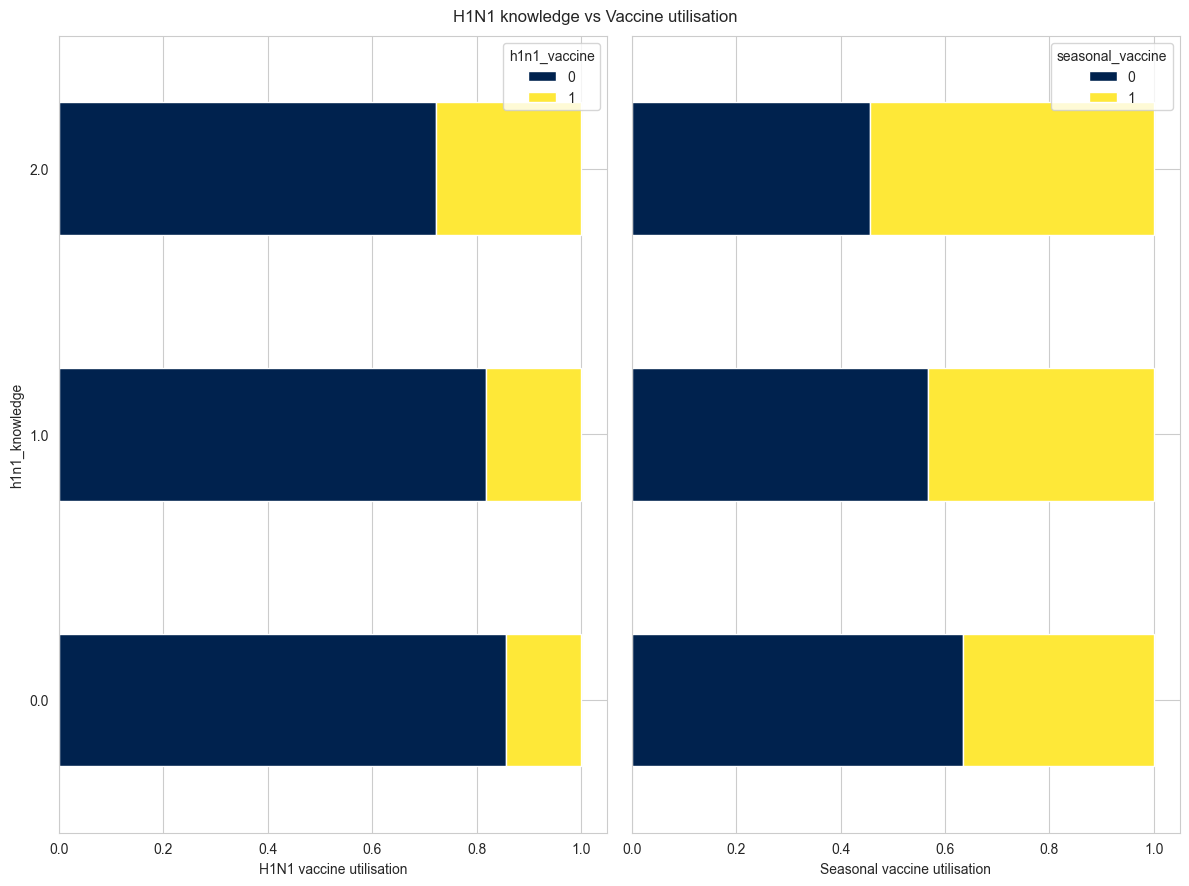

In [ ]:
fig,(ax_1,ax_2) = plt.subplots(figsize = (12,9),ncols = 2,sharey = True)

my_cmap = plt.cm.cividis
crosstab_know1 = pd.crosstab(data["h1n1_knowledge"],data['h1n1_vaccine'],normalize="index")
crosstab_know1.plot(kind = "barh",stacked = True,colormap=my_cmap,ax = ax_1)
crosstab_know2 = pd.crosstab(data["h1n1_knowledge"],data['seasonal_vaccine'],normalize="index")
crosstab_know2.plot(kind = "barh",stacked = True,colormap=my_cmap,ax = ax_2)
ax_1.set_xlabel("H1N1 vaccine utilisation")
ax_2.set_xlabel("Seasonal vaccine utilisation")

fig.suptitle("H1N1 knowledge vs Vaccine utilisation")
fig.tight_layout()

There is a noticeable increase in vaccine utilisation with increase in H1N1 knowledge. People are once again more likely to take seasonal flu vaccinations.

#### Relationship between concern about H1N1 and vaccine utilisation

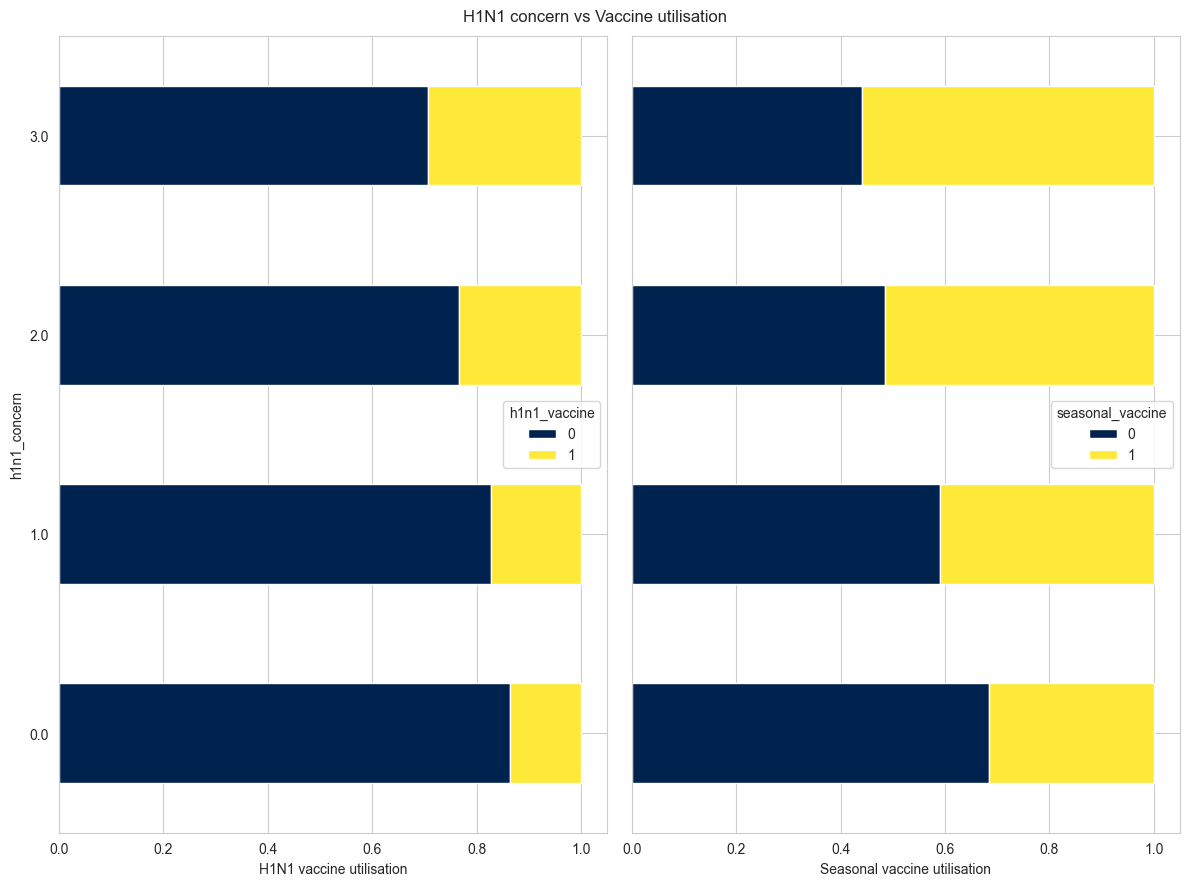

In [ ]:
my_cmap = plt.cm.cividis
fig,(ax_1,ax_2) = plt.subplots(figsize = (12,9),ncols = 2,sharey = True)

crosstab_concern1 = pd.crosstab(data["h1n1_concern"],data['h1n1_vaccine'],normalize="index")
crosstab_concern1.plot(kind = "barh",stacked = True,colormap=my_cmap,ax = ax_1)
crosstab_concern2 = pd.crosstab(data["h1n1_concern"],data['seasonal_vaccine'],normalize="index")
crosstab_concern2.plot(kind = "barh",stacked = True,colormap=my_cmap,ax = ax_2)
ax_1.set_xlabel("H1N1 vaccine utilisation")
ax_2.set_xlabel("Seasonal vaccine utilisation")

fig.suptitle("H1N1 concern vs Vaccine utilisation")
fig.tight_layout()

From this graph, the higher the concern about being infected with H1N1, the higher the likelihood of utilising the vaccine. Utilisation of seasonal flu vaccine is noticeably higher in all categories.

#### Relationship between gender, race, age group and vaccine uptake.

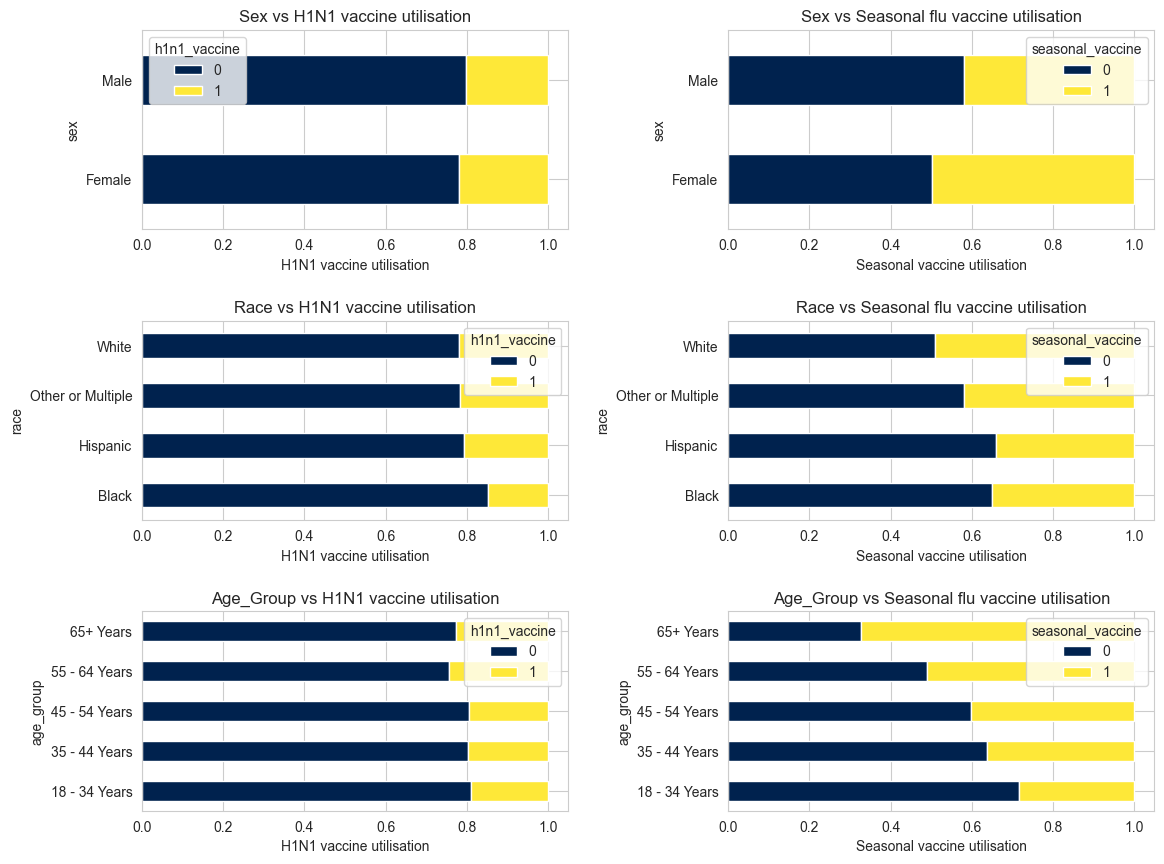

In [ ]:
fig,axes = plt.subplots(figsize = (12,9),ncols = 2,nrows = 3)
to_plot = ["sex","race","age_group"]

for idx,col in enumerate(to_plot):
    left_ax = axes[idx,0]
    right_ax = axes[idx,1]

    crosstab1 = pd.crosstab(data[col],data['h1n1_vaccine'],normalize="index")
    crosstab1.plot(kind = "barh",stacked = True,colormap=my_cmap,ax = left_ax)
    crosstab2 = pd.crosstab(data[col],data['seasonal_vaccine'],normalize="index")
    crosstab2.plot(kind = "barh",stacked = True,colormap=my_cmap,ax = right_ax)
    left_ax.set_xlabel("H1N1 vaccine utilisation")
    right_ax.set_xlabel("Seasonal vaccine utilisation")
    left_ax.set_title(f"{col.title()} vs H1N1 vaccine utilisation")
    right_ax.set_title(f"{col.title()} vs Seasonal flu vaccine utilisation")

fig.tight_layout(pad=2);

From the graphs produced, the following observations are noted:
* There are more women taking the seasonal flu vaccine. Vaccine utilisation between the genders is almost equal, however.
* H1N1 vaccine utilisation is also almost equal among all races except for the black race. Seasonal flu vaccine utilisation is much higher across the board.
* In the various age groups, H1N1 vaccine utilisation is almost similar across age groups. Younger respondents are less likely to take the seasonal flu vaccine however. 


#### Influence of opinions on seasonal flu vaccine uptake?

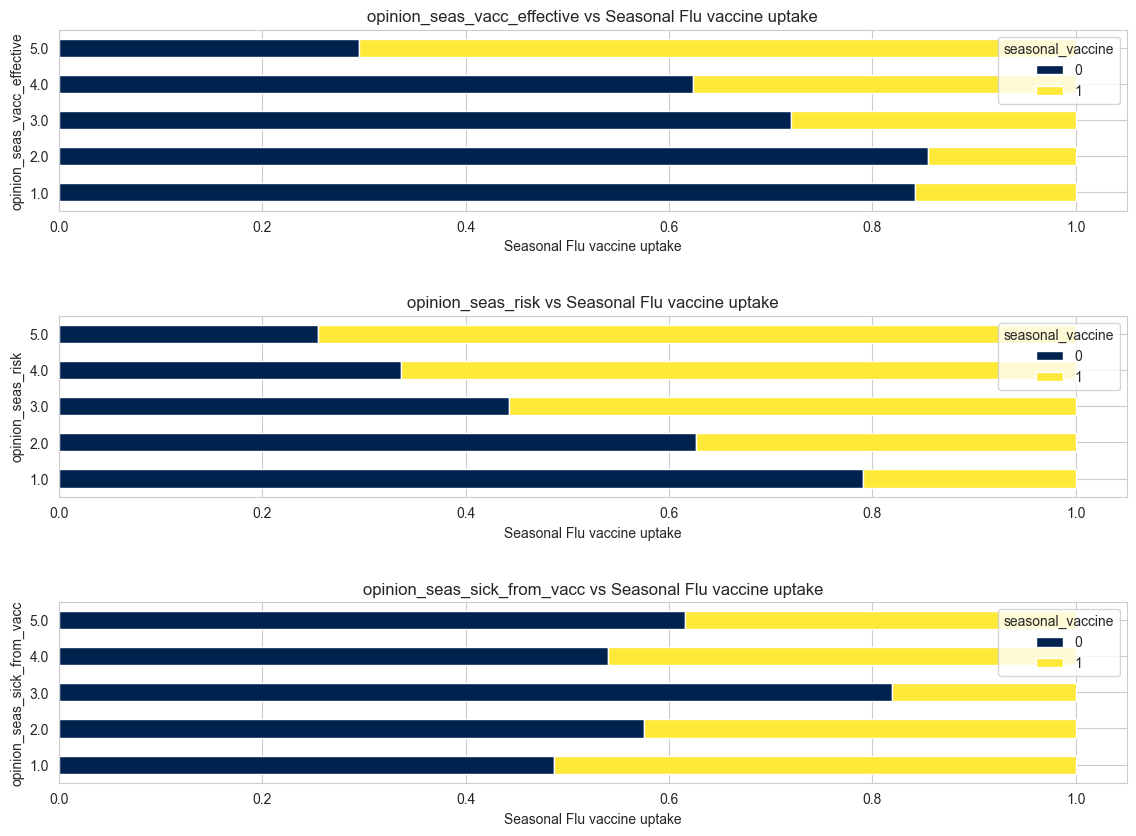

In [ ]:
fig,axes = plt.subplots(figsize = (12,9),nrows = 3)
features_to_plot = ['opinion_seas_vacc_effective','opinion_seas_risk','opinion_seas_sick_from_vacc',]

for idx,col in enumerate(features_to_plot):
    ax = axes[idx]
    crosstab1 = pd.crosstab(data[col],data['seasonal_vaccine'],normalize="index")
    crosstab1.plot(kind = "barh",stacked = True,colormap=my_cmap,ax = ax)
    ax.set_xlabel("Seasonal Flu vaccine uptake")
    ax.set_title(f"{col} vs Seasonal Flu vaccine uptake")

fig.tight_layout(pad=3);

Individuals that believe in the effectiveness of the seasonal flu vaccine are more likely to utilise it. People that are also more cautious about the risk of catching the flu without the vaccine are also more likely to utilise it.

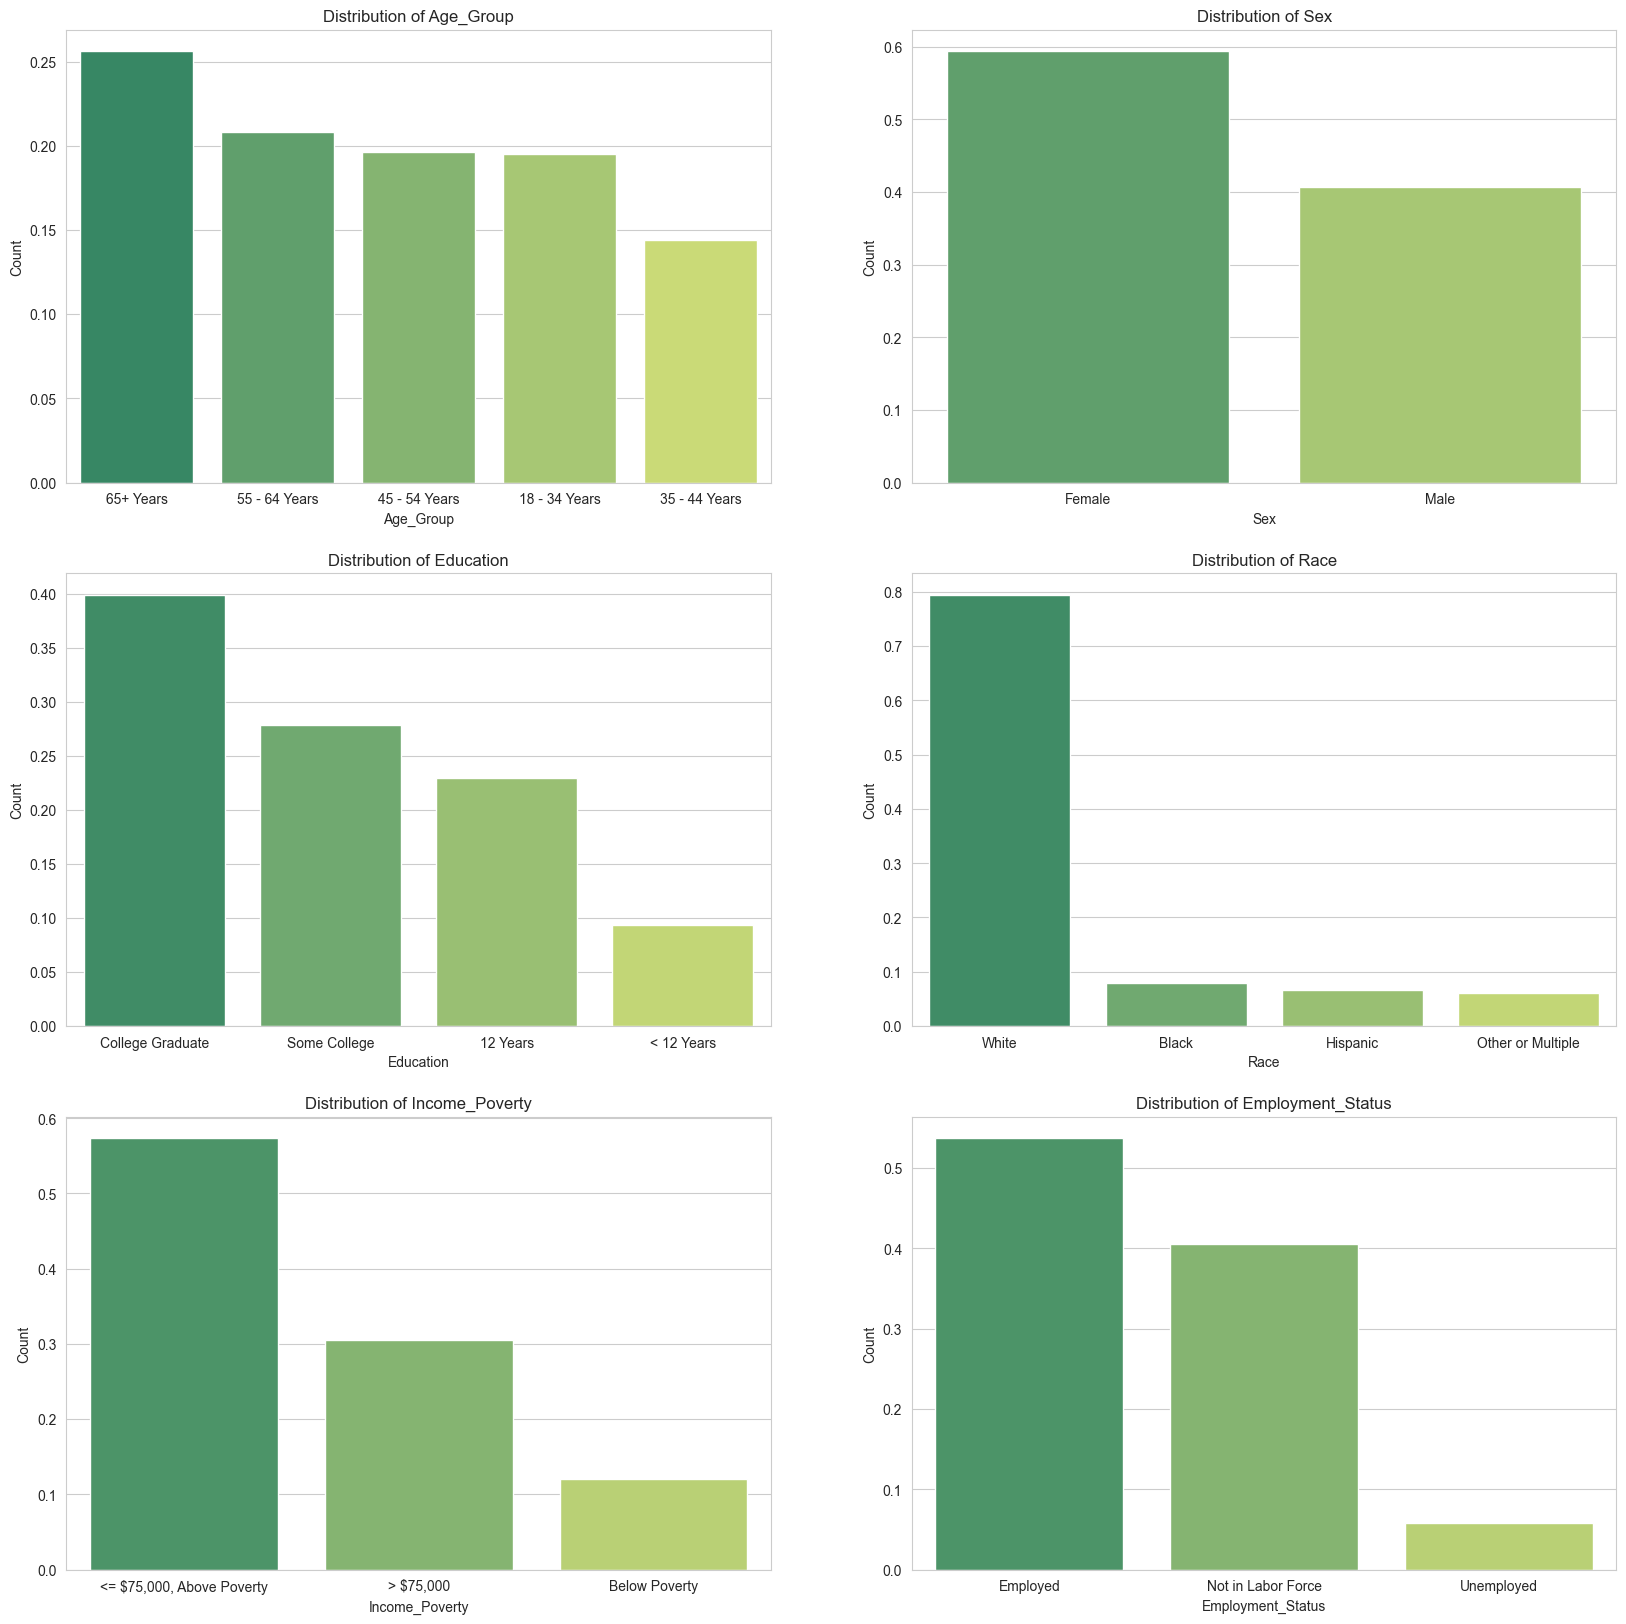

In [ ]:
# adding columns to plot to a list
columns = ["age_group","sex","education","race","income_poverty","employment_status"]

# setting style,axes and figsize
fig,axes = plt.subplots(figsize = (20,20),nrows = 3,ncols = 2)
sns.set_style("whitegrid")

for i,col in enumerate(columns):
    # defining the axis for plotting
    row = i//2
    column = i%2
    ax = axes[row][column]
    # defining x and y for the barchart
    x = data[col].value_counts(normalize=True).index
    y = data[col].value_counts(normalize=True)
    sns.barplot(x=x, y=y, hue=x, palette="summer", ax=ax, legend=False)
    ax.set_xlabel(f"{col.title()}")
    ax.set_ylabel("Count")
    ax.set_title(f"Distribution of {col.title()}");

#### Observations
* Majority of the respondents are above 65 years of age.
* About 60% of the respondents are female.
* Most of the respondents are college graduates.
* 80% are white.
* About 60% earn between the poverty line and around $75,000 annually.
* Most of the respondents are employed.

### 3. Data Processing

* In this section, I will prepare the data for modelling. I will address invalid data, missing data, wrong data types, scaling, encoding any categorical variables,dropping highly correlated columns and feature engineering. 
* I will first split the data into training and test data to prevent data leakage. 
*  The target variables are meant to be `h1n1_vaccine` and `seasonal_vaccine`. The two columns are both droped from X. 
* In this section, I focus on `seasonal_vaccine` as the target variable. 

In [ ]:
# separating target variables from the features
X = data.drop(["seasonal_vaccine","h1n1_vaccine"],axis=1)
y = data.seasonal_vaccine

In [ ]:
# splitting data into test and train and setting a random seed for reproducibility
random_seed = 1234
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=random_seed,stratify=y,test_size=0.2)

#### Checking for Multicollinearity
* Highly correlated columns will lead to multicollinearity. 
* This can affect model performance as there are two columns providing similar information. As such, one of the columns would need to be dropped. 
* I will create a dataframe with correlated pairs and their correlation coefficent. Anything above 80% will have one column dropped.

In [ ]:
# Filter only numeric columns before correlation
numeric_data = X_train.select_dtypes(include=['number'])

# Compute correlation on numeric columns only
df_corr = (
    numeric_data.corr()        # correlation matrix
    .abs()                     # absolute correlation
    .stack()                   # convert matrix to long format
    .reset_index()             # reset index for columns
    .sort_values(0, ascending=False)  # sort by correlation value
)

# Rename columns for clarity
df_corr.columns = ['Feature1', 'Feature2', 'Correlation']

# Remove self-pairs (Feature1 == Feature2)
df_corr = df_corr[df_corr['Feature1'] != df_corr['Feature2']]

# Drop duplicate pairs (A,B) and (B,A)
df_corr = df_corr.drop_duplicates(subset=['Correlation'])

# Show top correlations
print(df_corr.head(10))


                        Feature1                     Feature2  Correlation
274         doctor_recc_seasonal             doctor_recc_h1n1     0.589624
176  behavioral_large_gatherings      behavioral_outside_home     0.576798
497            opinion_seas_risk            opinion_h1n1_risk     0.563763
453  opinion_h1n1_sick_from_vacc  opinion_seas_sick_from_vacc     0.491009
403  opinion_h1n1_vacc_effective  opinion_seas_vacc_effective     0.474041
41                  h1n1_concern            opinion_h1n1_risk     0.376020
433  opinion_h1n1_sick_from_vacc                 h1n1_concern     0.360955
153        behavioral_wash_hands        behavioral_touch_face     0.360299
499            opinion_seas_risk  opinion_seas_vacc_effective     0.345633
148        behavioral_wash_hands         behavioral_avoidance     0.337190


The highest correlation is 58.9%. As a result, no columns will be dropped.

#### Missing values
Missing values will be addressed in the following ways:
* Replaced with mode or the string "missing".
* Dropped rows.

**The SimpleImputer class is used to impute columns with missing values with their modes and with string "missing".*

In [ ]:
# Viewing columns with missing data
missing_train = X_train.isna().sum().to_frame().sort_values(0,ascending = False)
missing_train

,0
employment_occupation,10843
employment_industry,10727
health_insurance,9828
income_poverty,3515
doctor_recc_seasonal,1711
doctor_recc_h1n1,1711
rent_or_own,1633
employment_status,1167
marital_status,1122
education,1118


In [ ]:
# instantiating a SimpleImputer to fill missing data with their modes
imputer_fill = SimpleImputer(strategy = "most_frequent",missing_values = np.nan)
cols_to_fill = ["income_poverty","doctor_recc_h1n1","doctor_recc_seasonal","education","health_insurance","health_worker"]

# fitting and transforming on the train data then reassigning 
X_train[cols_to_fill] = imputer_fill.fit_transform(X_train[cols_to_fill])

# transforming test data
X_test[cols_to_fill] = imputer_fill.transform(X_test[cols_to_fill])


In [ ]:
# instantiating a SimpleImputer to fill missing data with the string "missing"
imputer_miss = SimpleImputer(strategy="constant",missing_values=np.nan,fill_value="missing")
cols_miss = ["employment_status","employment_occupation","employment_industry"]

# fitting and transforming on the train data then reassigning
X_train[cols_miss] = imputer_miss.fit_transform(X_train[cols_miss])

# transforming test data
X_test[cols_miss] = imputer_miss.transform(X_test[cols_miss])
   

In [ ]:
# dropping rows with null values
X_train.dropna(inplace=True)
X_test.dropna(inplace=True)

In [ ]:
# checking for any null values in the train and test set
print("Number of null values in train data:",X_train.isnull().sum().sum(),"\n")
print("Number of null values in test data:",X_test.isnull().sum().sum())

Number of null values in train data: 0 

Number of null values in test data: 0


In [ ]:
# identifying indices to drop
set1 = set(y_test.index) 
set2 = set(X_test.index)
set3 = set(y_train.index)
set4 = set(X_train.index)

index_to_drop_test = list(set1-set2)
index_to_drop_train = list(set3-set4)

# dropping those rows
y_test = y_test.drop(index_to_drop_test)
y_train = y_train.drop(index_to_drop_train)

In [ ]:
# drop respondent id
X = X.drop('respondent_id', axis=1)

In [ ]:
# asserting the change
assert len(y_test) == len(X_test)
assert len(y_train) == len(X_train)

# Viewing the number of rows and columns in the train and test set
print("Train set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Train set shape: (18880, 36)
Test set shape: (4729, 36)


#### Encoding Categorical Values
Since most machine learning models are unable to work with categorical values, I will convert these values in my dataset to a numerical format. This section addresses this using the pandas `get_dummies` method. There are also three columns that have been encoded with random strings. They are to be replaced with numbers for readability then one-hot encoded.

#### Replacing column values
This can be achieved with the Ordinal encorder class which will result in a column of integers from 0 to n-1 categories.

In [ ]:
# assessing one of the columns with anonymised data
X_train.employment_industry.value_counts()

employment_industry
missing     8825
fcxhlnwr    1846
wxleyezf    1380
ldnlellj     920
pxcmvdjn     799
atmlpfrs     690
arjwrbjb     659
xicduogh     616
mfikgejo     479
rucpziij     397
vjjrobsf     388
xqicxuve     386
saaquncn     253
cfqqtusy     241
nduyfdeo     208
mcubkhph     203
wlfvacwt     157
dotnnunm     153
haxffmxo     112
msuufmds      95
phxvnwax      60
qnlwzans      13
Name: count, dtype: int64

In [ ]:
# columns to replace
to_replace = ['employment_industry','employment_occupation','hhs_geo_region']

# instantiating the class
ord_en = OrdinalEncoder()

# fitting and transforming on training data and transforming on test data
X_train[to_replace] = ord_en.fit_transform(X_train[to_replace])
X_test[to_replace] = ord_en.transform(X_test[to_replace])

# confirming the change
X_train.employment_industry.value_counts()

employment_industry
9.0     8825
4.0     1846
19.0    1380
6.0      920
13.0     799
1.0      690
0.0      659
20.0     616
8.0      479
15.0     397
17.0     388
21.0     386
16.0     253
2.0      241
11.0     208
7.0      203
18.0     157
3.0      153
5.0      112
10.0      95
12.0      60
14.0      13
Name: count, dtype: int64

##### One Hot Encoding
All the columns with the float and integer data types are categorical in nature thus necessitating their change into the category data type in preparation for one hot encoding.

In [ ]:
# assigning columns with float datatype to a variable
float_cols = X_train.select_dtypes(["float","int"]).columns

# for loop to convert datatype to category
for col in float_cols:
    X_train[col] = X_train[col].astype("category")
    X_test[col] = X_test[col].astype("category")

print(X_train.dtypes.value_counts(),"\n")
print(X_test.dtypes.value_counts()  )  

object      13
category     9
category     6
category     3
category     1
category     1
category     1
category     1
category     1
Name: count, dtype: int64 

object      13
category     9
category     6
category     3
category     1
category     1
category     1
category     1
category     1
Name: count, dtype: int64


In [ ]:
# using OneHotEncoder to encode categorical variables
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=True)
X_train_one_hot = encoder.fit_transform(X_train)
X_test_one_hot = encoder.transform(X_test)

In [ ]:
# One-hot encode train and test
X_train_one_hot = pd.get_dummies(X_train, drop_first=True)
X_test_one_hot  = pd.get_dummies(X_test, drop_first=True)

# Align columns to avoid mismatch
X_train_one_hot, X_test_one_hot = X_train_one_hot.align(X_test_one_hot, join='left', axis=1, fill_value=0)


# Check shapes
print(X_train_one_hot.shape, X_test_one_hot.shape)

(18880, 19000) (4729, 19000)


The dataset now exists in a binary format and is ready for modelling.


### 4. Modelling
* I will look at the iterative modelling process with an aim of arriving at one with the highest accuracy on the test data. 
* First, I will build a baseline model and evaluate its accuracy. 
* Cross validation will also be done to have a more accurate estimate of model performance. Logistic Regression and Decision Trees (Random Forest Model) are explored as methods of improving model performance.

#### 4a. Baseline Model
* A logistic regression model is used as the baseline model since we are dealing with a classification problem. A random state is assigned for reproducibility.

#### Feature Selection


In [ ]:
# defining function that fits a model and returns accuracy
def evaluation(model,X_train,y_train,X_test,y_test):
    
    # fitting the model
    model.fit(X_train,y_train)

    # generating predictions for train and test data
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    #performing cross validation
    cross_val = cross_val_score(model,X_train,y_train,cv = 10)

    #printing accuracy
    print(f"Train Accuracy: {round(accuracy_score(y_train,y_train_pred)*100,4)}%")
    print(f"Cross Validation Accuracy: {round(cross_val.mean()*100,4)}%")
    print(f"Test Accuracy: {round(accuracy_score(y_test,y_test_pred)*100,4)}%")


In [ ]:
baseline_model = LogisticRegression(random_state=random_seed, solver="saga", max_iter=200, tol=1e-3)

#evaluating model
print("Logistic Regression Baseline Model Scores")
evaluation(baseline_model,X_train_one_hot,y_train,X_test_one_hot,y_test)


Logistic Regression Baseline Model Scores
Train Accuracy: 86.4831%
Cross Validation Accuracy: 78.7553%
Test Accuracy: 78.008%


#### Interpretation
* The model performs well on training data (86.58%). However, the significant discrepancy with test data (8%) suggests some level of overfitting. The same is supported by the discrepancy with cross validation accuracy (also 8%).


In [ ]:
# previewing classification report 
pred_test = baseline_model.predict(X_test_one_hot)
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.78      0.82      0.80      2518
           1       0.78      0.74      0.76      2211

    accuracy                           0.78      4729
   macro avg       0.78      0.78      0.78      4729
weighted avg       0.78      0.78      0.78      4729



Our evaluation measures put the effectiveness of the model at 78%. This still does not meet our desired threshhold of 80%.

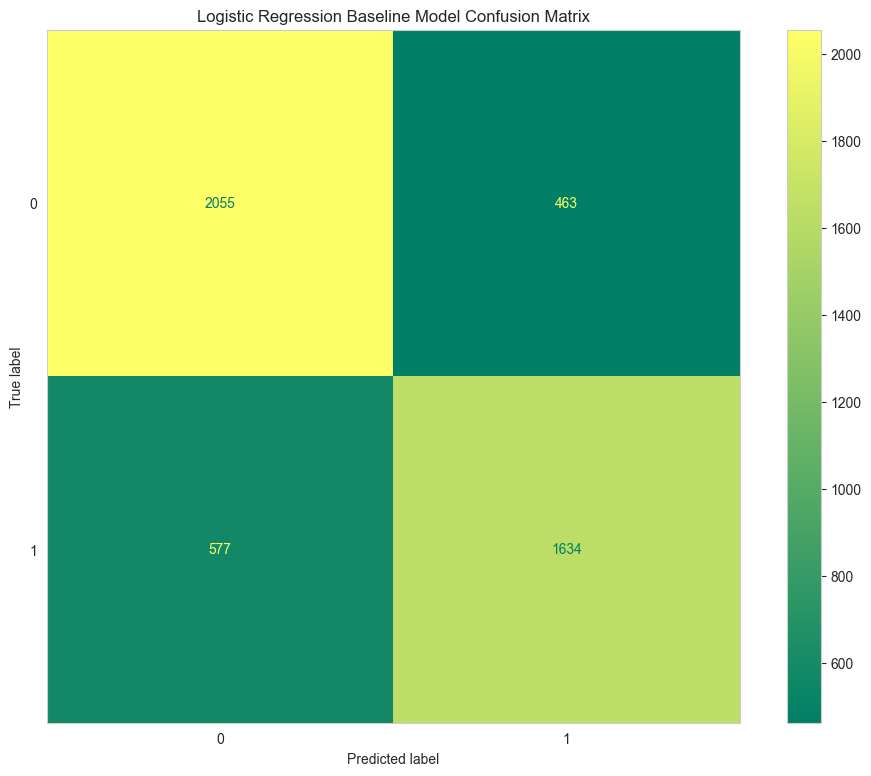

In [ ]:
# plotting confusion matrix for the baseline model
fig,ax = plt.subplots(figsize=(12,9))
plt.grid(False)

ConfusionMatrixDisplay.from_estimator(baseline_model,X_test_one_hot,y_test,cmap="summer",ax=ax)
ax.set_title("Logistic Regression Baseline Model Confusion Matrix");

Majority of our data falls within the True positive (1641) and True negative (2056) spectra. This is a good sign.

#### Feature Selection
To improve the model's performance and reduce overfitting, implementing feature elimination will be key in reducing model complexity.

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

# Keep top 500 features (you can adjust k)
selector = SelectKBest(chi2, k=500)
X_train_reduced = selector.fit_transform(X_train_one_hot, y_train)
X_test_reduced = selector.transform(X_test_one_hot)

In [ ]:
# Preview shapes
print("Previous number of features: ", X_train_one_hot.shape[1])
print("New number of features: ", X_train_reduced.shape[1])

Previous number of features:  19000
New number of features:  500


In [ ]:
# Baseline Logistic Regression on reduced features
baseline_model = LogisticRegression(solver="sag", random_state=random_seed, max_iter=100)
new_log = LogisticRegression(solver="sag", random_state=random_seed, max_iter=100)

print("Logistic Regression Model with SelectKBest features:")
evaluation(baseline_model, X_train_reduced, y_train, X_test_reduced, y_test)

print("\nLogistic Regression Model (same, retrained for comparison):")
evaluation(new_log, X_train_reduced, y_train, X_test_reduced, y_test)

Logistic Regression Model with SelectKBest features:
Train Accuracy: 79.1049%
Cross Validation Accuracy: 78.66%
Test Accuracy: 77.9657%

Logistic Regression Model (same, retrained for comparison):
Train Accuracy: 79.1049%
Cross Validation Accuracy: 78.66%
Test Accuracy: 77.9657%


The model output is the same across the original and retrained sample. The distance between the traning data and test data accuracy is very small (0.44%), which means the model doesn't overfit. That is a good sign. 

In [ ]:
# Viewing classification report
pred_test_tuned = new_log.predict(X_test_reduced)
print(classification_report(y_test, pred_test_tuned))

              precision    recall  f1-score   support

           0       0.78      0.81      0.80      2518
           1       0.78      0.74      0.76      2211

    accuracy                           0.78      4729
   macro avg       0.78      0.78      0.78      4729
weighted avg       0.78      0.78      0.78      4729



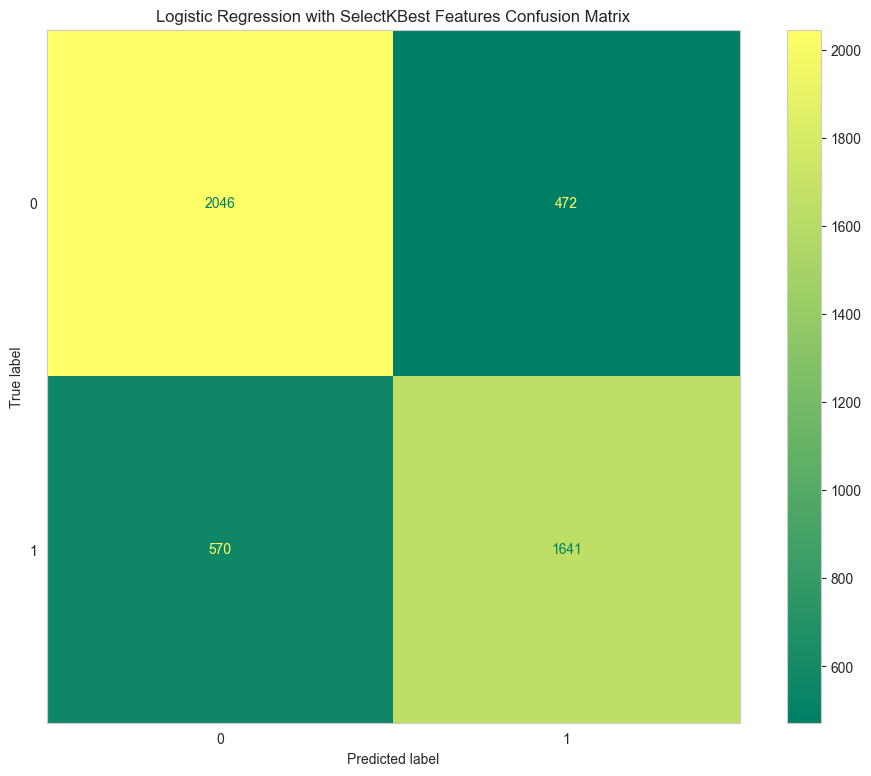

In [ ]:
# Plotting confusion matrix
fig, ax = plt.subplots(figsize=(12, 9))
plt.grid(False)

ConfusionMatrixDisplay.from_estimator(
    new_log, 
    X_test_reduced, 
    y_test, 
    ax=ax, 
    cmap="summer"
)
ax.set_title("Logistic Regression with SelectKBest Features Confusion Matrix");


There is a reduction in False Negatives and False Positives and an increase in True Positives and True Negatives. This is a good outcome.

#### 4b. Random Forest Model

In [ ]:
# Instantiating a random forest classifier with default hyperparameters
rf = RandomForestClassifier(random_state=random_seed, n_jobs=-1)

print("Random Forest Model with default hyperparameters:")
evaluation(rf, X_train_reduced, y_train, X_test_reduced, y_test)

Random Forest Model with default hyperparameters:
Train Accuracy: 100.0%
Cross Validation Accuracy: 77.0339%
Test Accuracy: 77.2256%


This classifier is overfitting as the train data accuracy is almost 100% while the test data accuracy is significantly less. It is not able to generalise well.
Tuning the hyperparameters should solve the situation.

#### Tuning Hyperparameters
Focus will be on the following:
* n_estimators - Specifies the number of trees that shoud be planted. More trees = Higher complexity
* max_leaf_nodes - Restricts tree growth by specifiying the maximum number of leaf nodes allowed, after which no more splitting can take place.
* min_samples_split - Specifies the minimum number of observations in a given node before splitting. A higher number = less chance of overfitting.


In [ ]:
params = [
    {
        "max_leaf_nodes": [100, 150, 200],
        "min_samples_split": range(2, 6),
        "n_estimators": [100, 150, 200]
    }
]

grid = GridSearchCV(rf, param_grid=params, cv=5, n_jobs=-1)
grid.fit(X_train_reduced, y_train)

print("The best parameters are:\n", grid.best_params_)


The best parameters are:
 {'max_leaf_nodes': 200, 'min_samples_split': 4, 'n_estimators': 200}


In [ ]:
rf_tuned = RandomForestClassifier(
    random_state=random_seed,
    max_leaf_nodes=200,
    min_samples_split=5,
    n_estimators=100
)

print("Random Forest Model with tuned hyperparameters:")
evaluation(rf_tuned, X_train_reduced, y_train, X_test_reduced, y_test)


Random Forest Model with tuned hyperparameters:
Train Accuracy: 79.5286%
Cross Validation Accuracy: 77.2299%
Test Accuracy: 77.0988%


There's a notable improvement in the overfitting that characterised the previous iteration.

In [ ]:
# Previewing classification report
pred_test_tuned_rf = rf_tuned.predict(X_test_reduced)
print(classification_report(y_test, pred_test_tuned_rf))

              precision    recall  f1-score   support

           0       0.77      0.81      0.79      2518
           1       0.77      0.72      0.75      2211

    accuracy                           0.77      4729
   macro avg       0.77      0.77      0.77      4729
weighted avg       0.77      0.77      0.77      4729



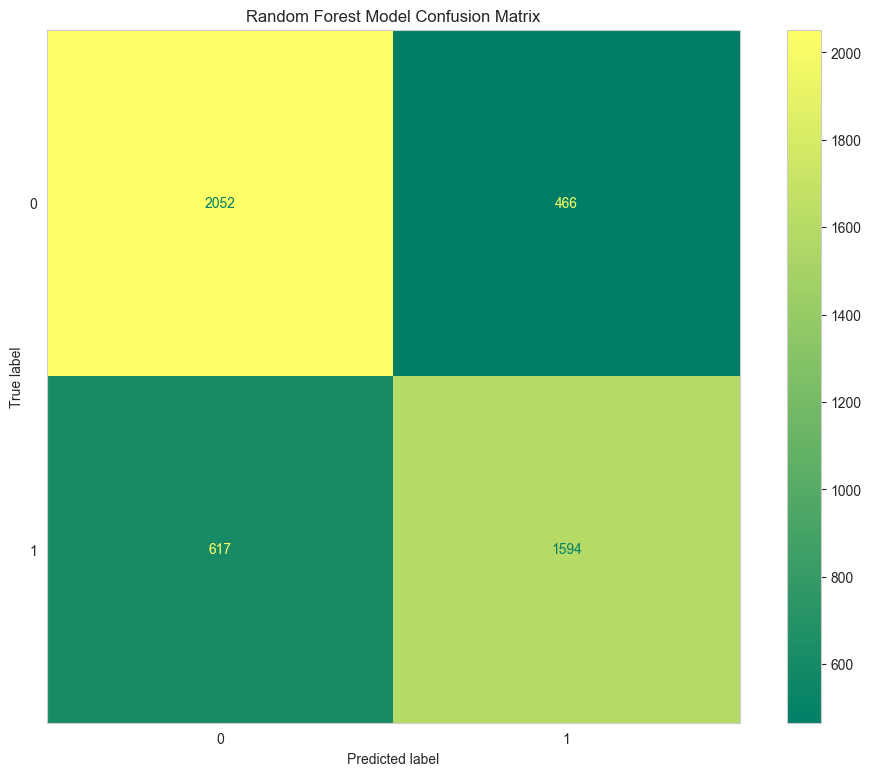

In [ ]:
# Plotting confusion matrix
fig, ax = plt.subplots(figsize=(12, 9))
plt.grid(False)

ConfusionMatrixDisplay.from_estimator(
    rf_tuned, 
    X_test_reduced, 
    y_test, 
    ax=ax, 
    cmap="summer"
)
ax.set_title("Random Forest Model Confusion Matrix");

##### Feature Relevance
Plotting a graph of feature relevance allows me to determine the features that have the most impact on the model when it comes to predicting the target variable.

In [ ]:
# Creating a dataframe of feature importances
selected_features = selector.get_feature_names_out()

feat_rf = pd.DataFrame(
    data=rf_tuned.feature_importances_,
    index=selected_features,
    columns=["importance"]
)

feat_rf = feat_rf.sort_values("importance", ascending=False)

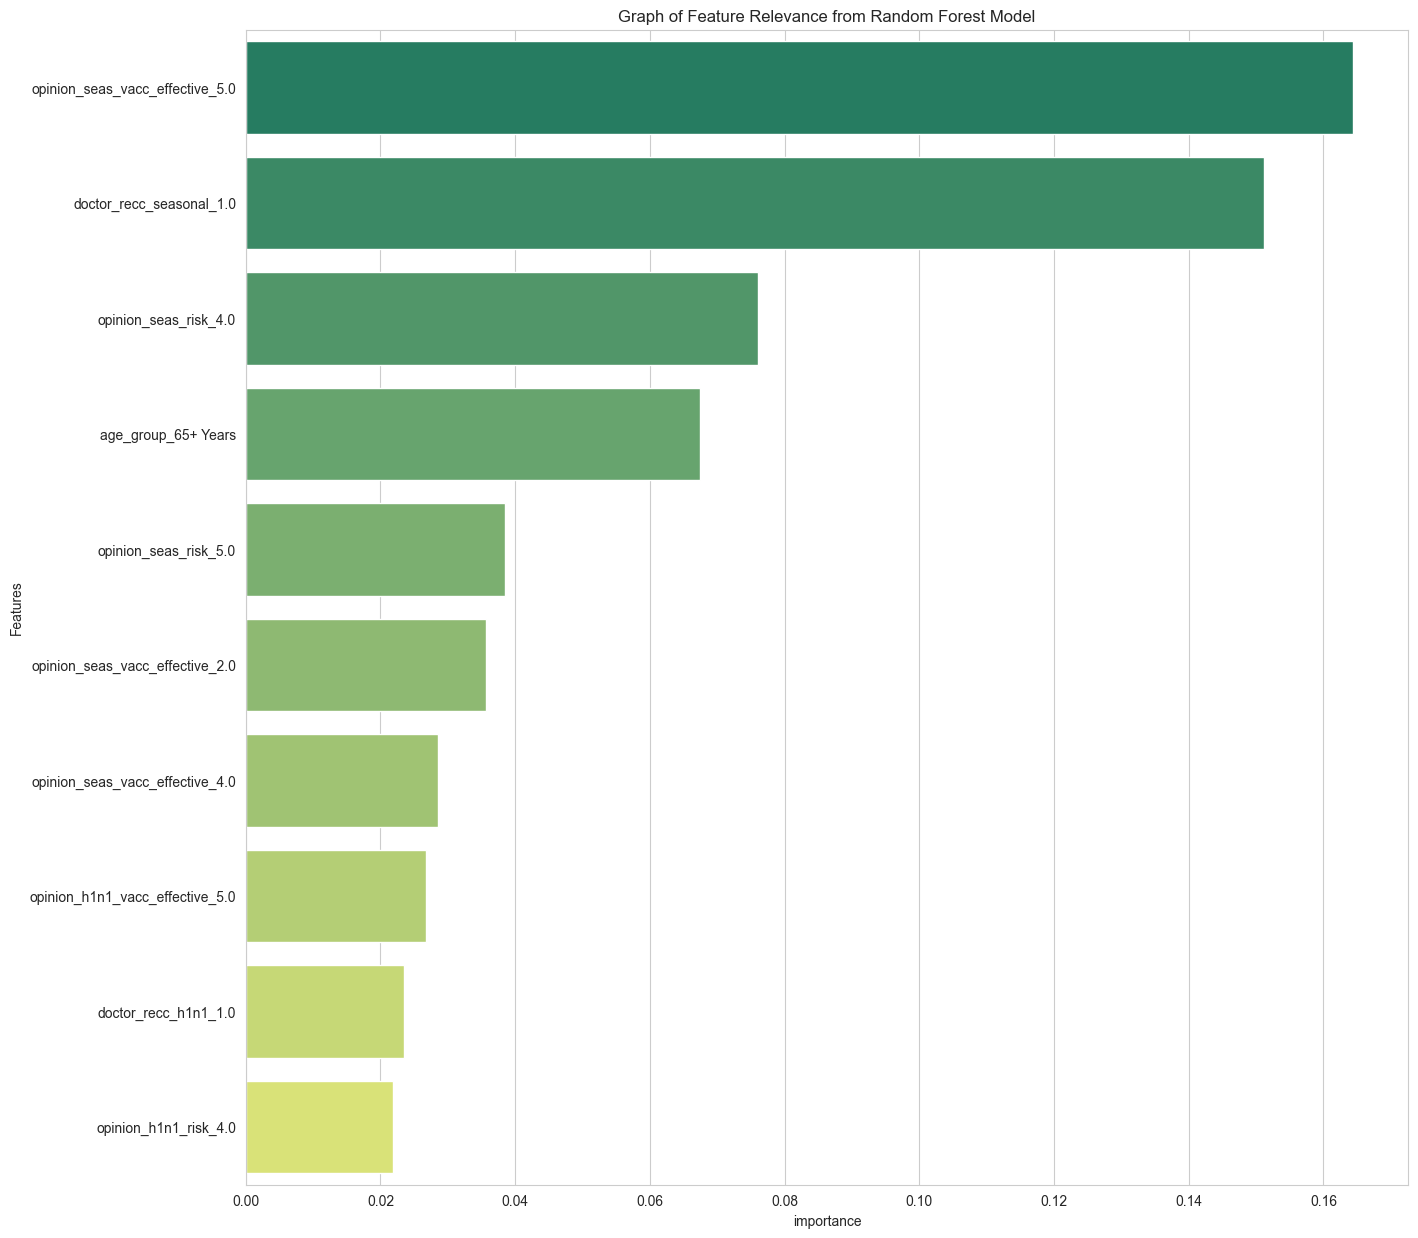

In [ ]:
# plotting graph of top 10 most relevant features

fig,ax = plt.subplots(figsize = (15,15))

sns.barplot(x=feat_rf.importance[:10],y = feat_rf.index[:10],orient="h",palette="summer",ax=ax)
ax.set_ylabel("Features")
ax.set_title("Graph of Feature Relevance from Random Forest Model");

From this graph, it is clear that a positive opinion on the effectiveness of the seasonal flu vaccine has the biggest influence on the likelihood of taking the vaccine, followed by a doctor's recommendation to take it. This also aligns with what was discovered during the exploratory data analysis phase. 

In [ ]:
# Pickling the final model so you don't have to retrain it
import joblib

with open("seasonal_flu_model.pkl", "wb") as f:
    joblib.dump(rf_tuned, f)

### 5. Evaluation
The best model is the logistic regression with an accuracy of 77.9% and a training accuracy of 79.1%. Cross validation also gave a mean accuracy of 78.66%. This means the model is able to correctly classify 77.9% of observations.

Some features that are relevant in predicting the utilisation of seasonal flu vaccination are:
* The respondents' opinion on the effectiveness of the vaccine is a positive indicator of their utilisation of the vaccine.
* Doctor's recommendation to take the vaccine is a positive indicator of their utilisation of the vaccine.
* The respondent's opinion on the risks involved with not being vaccinated. A high risk of getting sick = increased likelihood of vaccination.
* People older than 65.

These feature relevancies have also dominated all the tested models.



### 6. Recommendations
From the models it can be concluded that people's opinions have a huge impact on their likelihood to take vaccines. Therefore, the following recommendations can be made:
* Public awareness campaigns should be made regarding the effectiveness of the seasonal flu vaccine as well as the risks associated with the flu.
* Elderly people (65+) are more likely to utilise the seasonal flu vaccine. The younger population could, therefore, be targeted for such campaigns.
* Emphasis on the safety of the vaccines for use by the public would be useful.